In [1]:
# https://github.com/dnllvrvz/Social-Network-Dataset/blob/master/Social%20Network%20Dataset.xlsx

In [15]:
import pandas as pd
import numpy as np
import networkx as nx
from random import sample
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
# load data
graph_data = pd.read_excel("/Users/jasmine/Downloads/Social Network Dataset.xlsx",
                          sheet_name = ['Elements','Connections'])

In [4]:
element_data = graph_data["Elements"]

In [5]:
connection_data = graph_data["Connections"]

In [6]:
element_data.head()

,Label,Type,School (ID),Answered the form
0,S-c1b610,Student,27,Yes
1,S-4985b3,Student,25,Yes
2,S-376418,Student,67,Yes
3,S-d00f38,Student,24,Yes
4,S-e538e3,Student,30,Yes


In [7]:
connection_data.head()

,From,To,Type,Weight,When
0,S-c1b610,S-7d9053,Other,1.0,2012.0
1,S-4985b3,S-e7dad4,School,1.0,2015.0
2,S-376418,S-ab3070,School,1.0,2012.0
3,S-d00f38,S-6e1f64,School,1.0,2016.0
4,S-e538e3,S-596786,Other,1.0,1994.0


In [12]:
# assign edge attributes
edge_attr_col = ["Type","Weight","When"]

graph = nx.convert_matrix.from_pandas_edgelist(connection_data,
                                              source="From",
                                              target="To",
                                              edge_attr=edge_attr_col)
# sample from graph edges
sampled_edges = sample(graph.edges,10)
graph.edges[sampled_edges[0]]

In [13]:
# assign node attributes
node_dict = element_data.set_index('Label').to_dict(orient = 'index')
nx.set_node_attributes(graph,node_dict)

# sample from graph nodes
sampled_nodes = sample(graph.nodes,10) 
graph.nodes[sampled_nodes[0]]

{'Answered the form': 'Yes', 'School (ID)': 27, 'Type': 'Student'}

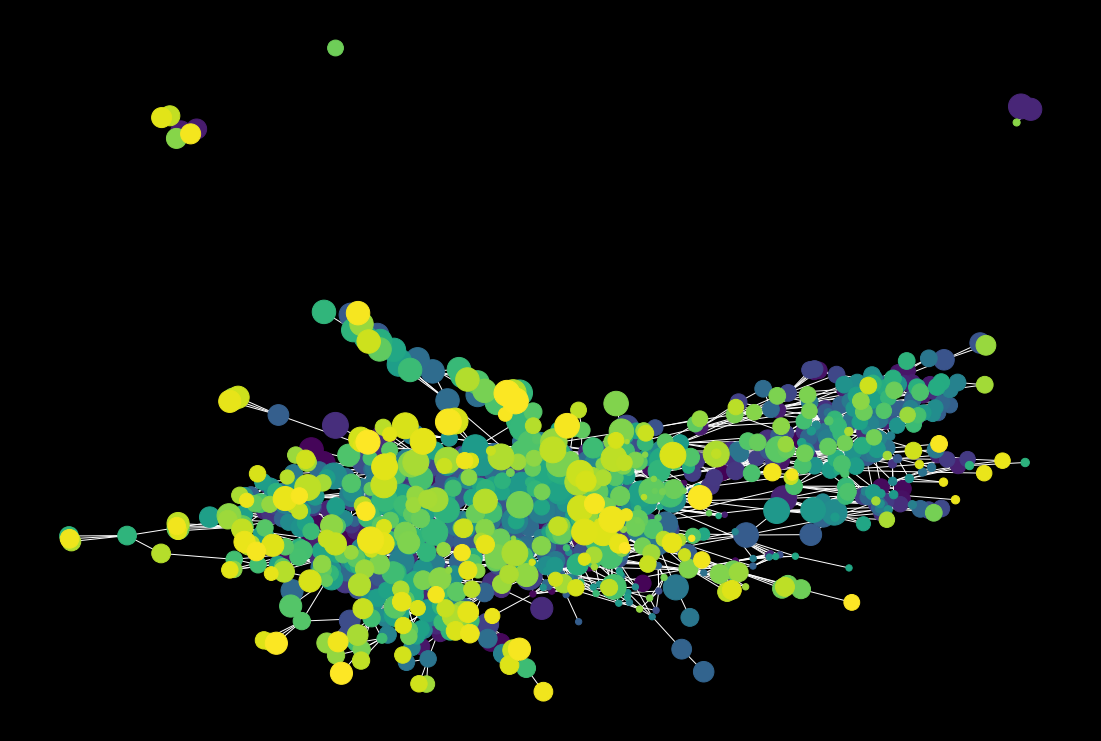

In [21]:
fig = plt.figure(figsize= (15,10))
colors = np.linspace(0,1,len(graph.nodes))                                   # assign node color from node numbers
node_size = [10* nx.get_node_attributes(graph, 'School (ID)')[v] for v in graph] # assign node size from school id
nx.draw(graph,
       node_size = node_size,
       node_color = colors,
       edge_color = 'white')
fig.set_facecolor('black')

In [22]:
# layout
[x for x in nx.__dir__() if x.endswith('_layout')]

['bipartite_layout',
 'circular_layout',
 'kamada_kawai_layout',
 'random_layout',
 'rescale_layout',
 'shell_layout',
 'spring_layout',
 'spectral_layout',
 'planar_layout',
 'fruchterman_reingold_layout',
 'spiral_layout']

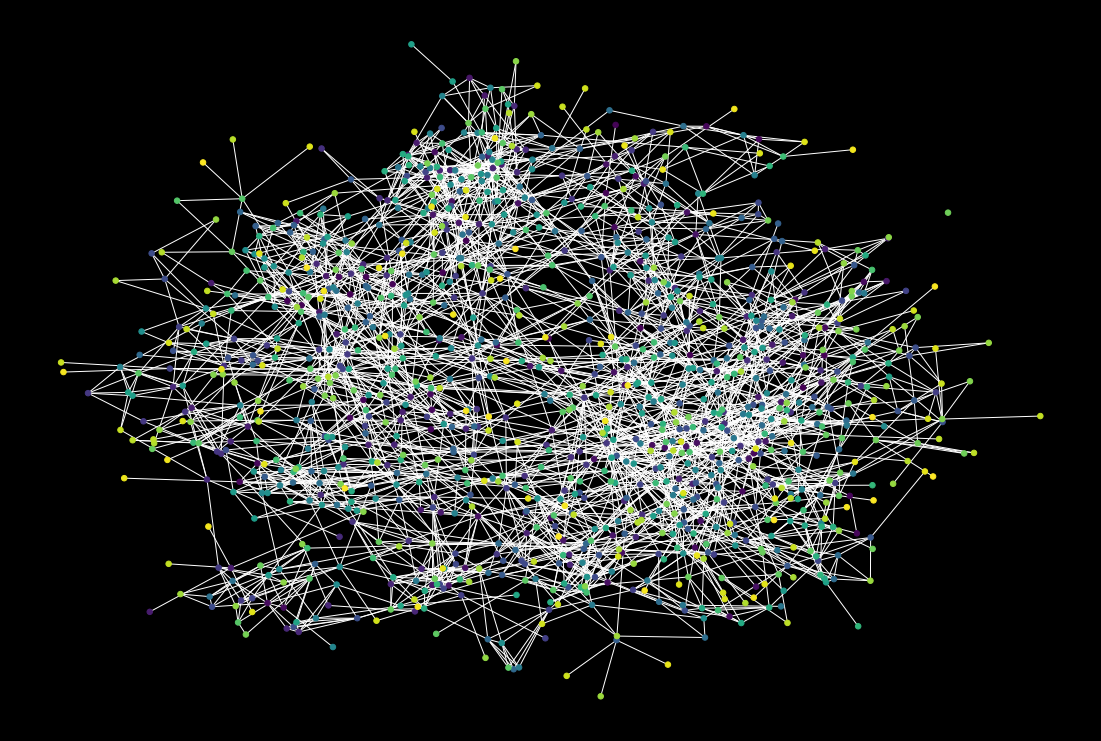

In [23]:
colors = np.linspace(0,1,len(graph.nodes))
fig = plt.figure(figsize=(15,10))

k = 0.1
layout = nx.spring_layout(graph, k = k)

nx.draw(graph,
       node_size = 30,
        pos=layout,
       node_color = colors,
       edge_color = 'white')
fig.set_facecolor('black')

In [25]:
centrality = nx.degree_centrality(graph)

In [55]:
#centrality


In [69]:
edge_width = [100*graph[u][v]['Weight'] for u,v in graph.edges()] # assign edge width from Weight

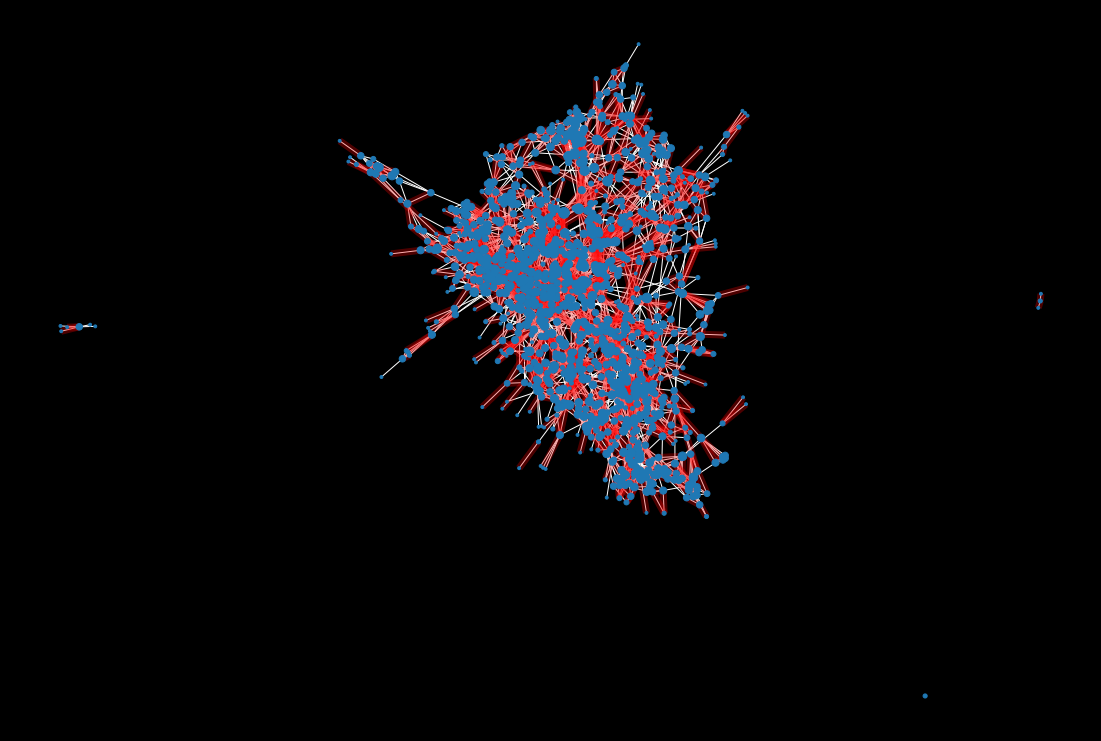

In [72]:
fig = plt.figure(figsize=(15,10))
pos=nx.spring_layout(graph)

# node size based on node degrees
node_size = [10000* centrality[node] for node in centrality]

# assign edge width from Weight
edge_width = [100*graph[u][v]['Weight'] for u,v in graph.edges()] 

# select edges weight > 0.6
greater_than_06 = [x for x in graph.edges(data=True) if x[2]['Weight']>0.6]

nx.draw(graph,
        pos,
       node_size = node_size,
        edge_width = edge_width,
       edge_color = 'white')
fig.set_facecolor('black')

# draw edges over 0.6
nx.draw_networkx_edges(graph, 
                       pos,
                       edgelist=greater_than_06, 
                       edge_color='r', 
                       alpha=0.3, 
                       width=7)